Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

Import Data

In [7]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
len(df[df["Outcome"]==1]), len(df[df["Outcome"]==0])

(268, 500)

Visualize Data to investigate

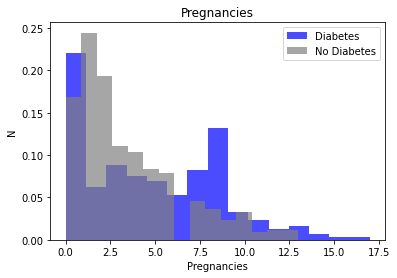

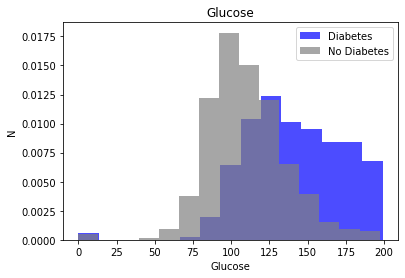

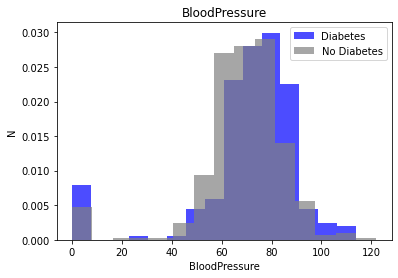

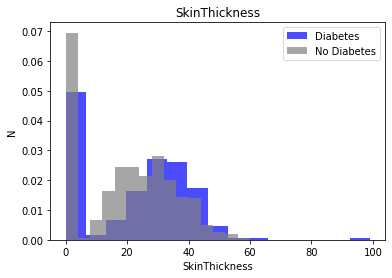

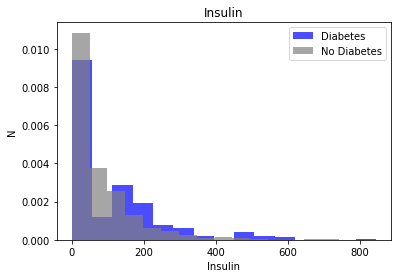

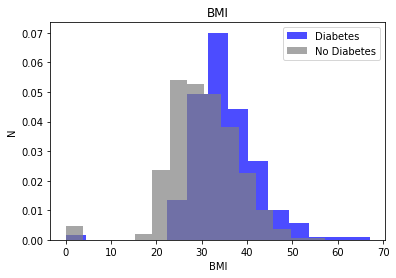

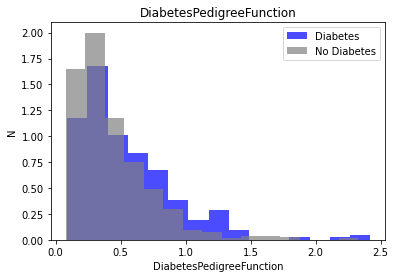

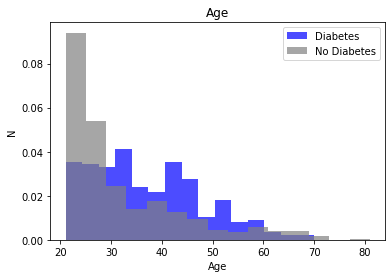

In [9]:
for i in range (len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"]==1][label], color = "blue", label = "Diabetes", alpha = 0.7, density=True, bins=15)
  plt.hist(df[df["Outcome"]==0][label], color = "grey", label = "No Diabetes", alpha = 0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Split into inputs and outputs (x is input matrix, y is one-dimensional outcomes)

In [10]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

Normalize Dataset

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

Scale Dataset

In [12]:
over = RandomOverSampler()
x, y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

Split Data into training and testing subsets

In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=0)

Create Model

In [14]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(16, activation="relu"),
                            tf.keras.layers.Dense(16, activation="relu"),
                            tf.keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.BinaryFocalCrossentropy(), metrics=["accuracy"])

Train Model

In [19]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 0s 4ms/step - loss: 0.1162 - accuracy: 0.7800 - val_loss: 0.1083 - val_accuracy: 0.8150
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.7833 - val_loss: 0.1079 - val_accuracy: 0.8250
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.7817 - val_loss: 0.1072 - val_accuracy: 0.8250
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.7783 - val_loss: 0.1083 - val_accuracy: 0.8200
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.7883 - val_loss: 0.1077 - val_accuracy: 0.8100
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.7900 - val_loss: 0.1073 - val_accuracy: 0.8150
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.7867 - val_loss: 0.1086 - val_accuracy: 0.8050
Epoch 8/20
38/38 [==

Evaluate Model on Unseen Data

In [22]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.7650


[0.12726888060569763, 0.7649999856948853]

In [18]:
#~76.5% accuracy